In [1]:
from pathlib import Path
import sys  
sys.path.insert(0, '..')
from mapumap.cluster import *

/home/yongha/.cache/pypoetry/virtualenvs/mapumap-6CQ1eBGH-py3.9/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yongha/.cache/pypoetry/virtualenvs/mapumap-6CQ1eBGH-py3.9/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yongha/.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
import matplotlib.pyplot as plt

def display_topics(model, feature_names, num_top_words, topic_names=None):

    for ix, topic in enumerate(model.components_):
        #print topic, topic number, and top words
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] \
             for i in topic.argsort()[:-num_top_words - 1:-1]])) 
        
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx }", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


In [43]:
df_pop = read_data_population(Path('../sample'))
df = pd.read_csv('../sample/df_merged.tsv', sep='\t')
data_raw = long_to_wide(df_pop).drop(columns=['ADMCD'])
# Assuming your array is named 'arr'

row_sums = np.sum(data_raw.to_numpy(), axis=1)  # Calculate the row sums
row_sums = row_sums.reshape(-1, 1)  # Reshape row sums to match array dimensions

column_sums = np.sum(data_raw.to_numpy(), axis=0)  # Calculate the column sums
column_sums = column_sums.reshape(1, -1)  # Reshape column sums to match array dimensions

data = (data_raw / row_sums).fillna(0)


Index(['ADMCD_000_', 'POP_005_M', 'POP_005_F', 'POP_010_M', 'POP_010_F',
       'POP_015_M', 'POP_015_F', 'POP_020_M', 'POP_020_F', 'POP_025_M',
       'POP_025_F', 'POP_030_M', 'POP_030_F', 'POP_035_M', 'POP_035_F',
       'POP_040_M', 'POP_040_F', 'POP_045_M', 'POP_045_F', 'POP_050_M',
       'POP_050_F', 'POP_055_M', 'POP_055_F', 'POP_060_M', 'POP_060_F',
       'POP_065_M', 'POP_065_F', 'POP_070_M', 'POP_070_F', 'POP_075_M',
       'POP_075_F', 'POP_080_M', 'POP_080_F', 'POP_085_M', 'POP_085_F',
       'POP_090_M', 'POP_090_F', 'POP_095_M', 'POP_095_F', 'POP_100_M',
       'POP_100_F', 'POP_105_M', 'POP_105_F'],
      dtype='object')


In [84]:
num_topic = 12
nmf = NMF(
    n_components=num_topic,
    random_state=1,
    max_iter=3000,
    init="nndsvda",
    beta_loss="frobenius",
    alpha_W=0.000005,
    alpha_H=0.000005,
    l1_ratio=0.01,
).fit(data.fillna(0))


nmf_embedding = mbnmf.fit_transform(data)
top_idx = np.argsort(nmf_embedding,axis=0)[-15:]
count = 0
for idxs in top_idx.T: 
    print("\nTopic {}:".format(count))
    for idx in idxs:
        print(df.iloc[idx]['ADMNM'])
    count += 1


Topic 0:
부산광역시 금정구 부곡제4동
부산광역시 금정구 부곡제1동
경상남도 통영시 북신동
경상북도 포항시 북구 죽도동
경상남도 창원시 마산회원구 합성2동
서울특별시 중구 명동
경상남도 밀양시 상동면
경상북도 포항시 북구 죽장면상옥출장소
경상북도 포항시 남구 송도동
경상북도 포항시 남구 해도동
부산광역시 중구 부평동
대구광역시 달서구 상인3동
서울특별시 강남구 수서동
충청남도 공주시 신풍면
경기도 광명시 광명1동

Topic 1:
서울특별시 강남구 대치4동
서울특별시 서초구 반포2동
경기도 용인시 기흥구 동백2동
대구광역시 북구 동천동
경기도 성남시 분당구 수내3동
대구광역시 달서구 월성1동
대전광역시 서구 둔산1동
서울특별시 강남구 대치2동
경기도 안양시 동안구 귀인동
서울특별시 서초구 반포본동
서울특별시 노원구 중계본동
대구광역시 수성구 범어4동
대구광역시 수성구 만촌3동
서울특별시 노원구 중계1동
서울특별시 강남구 대치1동

Topic 2:
서울특별시 관악구 행운동
서울특별시 마포구 서교동
서울특별시 강남구 역삼1동
대구광역시 중구 성내1동
서울특별시 관악구 낙성대동
광주광역시 동구 충장동
서울특별시 관악구 중앙동
서울특별시 관악구 청룡동
서울특별시 금천구 가산동
서울특별시 서대문구 신촌동
서울특별시 광진구 화양동
서울특별시 강서구 가양제1동
서울특별시 영등포구 영등포동
서울특별시 관악구 신림동
부산광역시 중구 중앙동

Topic 3:
경상남도 거제시 상문동
경상남도 거제시 수양동
대구광역시 달성군 유가읍
경기도 화성시 새솔동
경기도 시흥시 배곧1동
세종특별자치시 고운동
경기도 성남시 분당구 수내2동
충청남도 천안시 서북구 불당2동
경상남도 거제시 아주동
전라북도 전주시 덕진구 혁신동
대구광역시 달서구 유천동
경기도 화성시 동탄4동
세종특별자치시 해밀동
부산광역시 강서구 명지2동
충청남도 계룡시 신도안면

Topic 4:
전라남도 장흥군 장평면
경상남도 남해군 서면
전라남도 해남군 계곡면
전라남도 고흥군 두원면
전라남도 보성군 겸백면
전라남도 순천

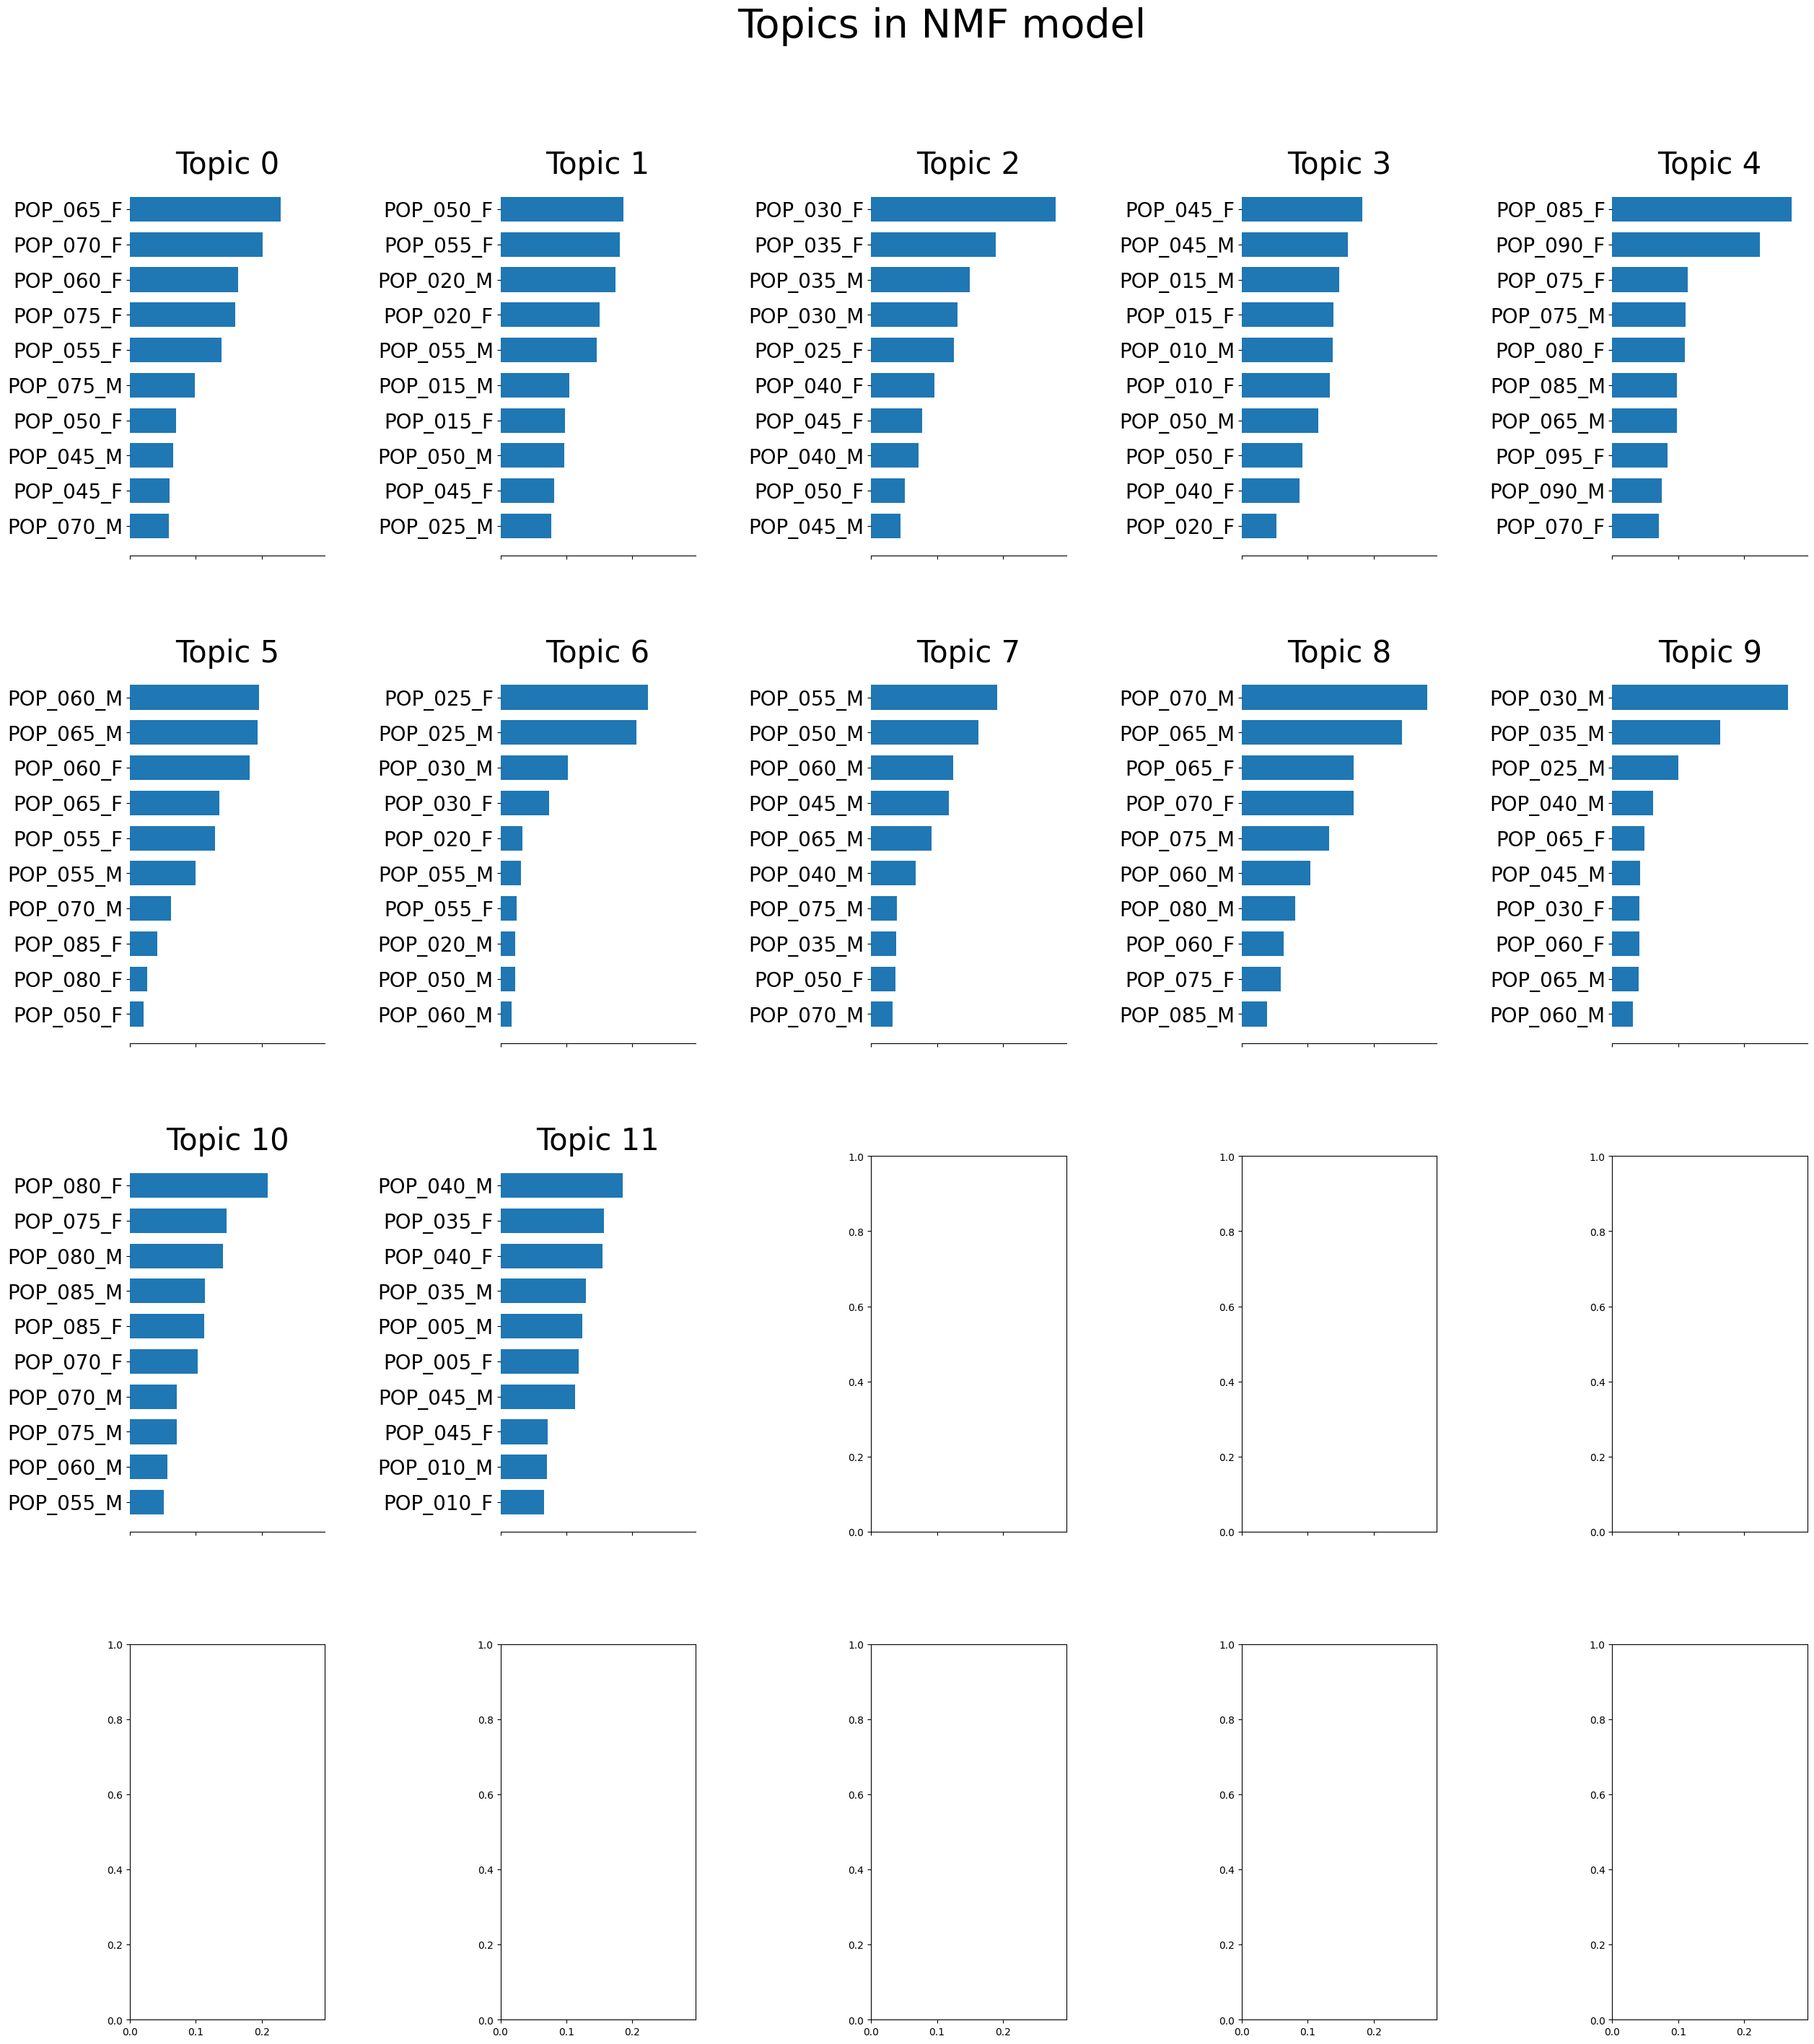

In [85]:
plot_top_words(
    mbnmf,
    data.columns,
    10,
    "Topics in NMF model",
)

In [88]:
W = mbnmf.fit_transform(data)
H = mbnmf.components_
most_salient_factors = np.argmax(W, axis=1)
df_factor = pd.DataFrame(W, columns = [f"topic_{n}" for n in range(0, num_topic)])
df_factor['topK'] = most_salient_factors
df_factor['topK'].value_counts()

topK
4     543
8     495
5     419
1     412
2     392
3     381
0     301
11    209
7     151
10    106
6      95
9      80
Name: count, dtype: int64

In [89]:
df_all = pd.concat([df, df_factor], axis=1)
df_all

,ADMCD,POP_005_M,POP_005_F,POP_010_M,POP_010_F,POP_015_M,POP_015_F,POP_020_M,POP_020_F,POP_025_M,...,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topK
0,1111051500,109,114,215,191,289,263,295,269,318,...,0.089329,0.029290,0.073935,0.036423,0.022685,0.012179,0.031145,0.052832,0.062951,1
1,1111053000,92,86,159,157,145,177,142,201,187,...,0.063392,0.038484,0.081851,0.016086,0.024336,0.025167,0.013545,0.038218,0.080108,2
2,1111054000,12,14,26,30,44,40,56,29,56,...,0.063959,0.055123,0.060760,0.027866,0.035559,0.064196,0.035452,0.047475,0.047367,2
3,1111055000,58,58,127,154,215,164,259,216,254,...,0.062489,0.025900,0.079536,0.042571,0.029440,0.035553,0.048195,0.043298,0.052238,1
4,1111056000,213,185,338,292,344,373,392,412,504,...,0.078547,0.027507,0.108389,0.054254,0.007134,0.042607,0.030811,0.036312,0.066073,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,5013058000,219,210,346,385,392,400,347,339,330,...,0.154442,0.016900,0.064189,0.062256,0.029964,0.035720,0.035063,0.044365,0.086347,3
3580,5013059000,371,294,438,394,418,363,350,317,338,...,0.118230,0.017997,0.062217,0.030109,0.061298,0.039944,0.031658,0.037901,0.112449,3
3581,5013060000,305,244,432,432,392,324,278,248,314,...,0.144740,0.018068,0.068743,0.044030,0.078075,0.031631,0.022967,0.032712,0.111019,3
3582,5013061000,198,204,267,268,346,295,273,246,302,...,0.106450,0.029262,0.067647,0.040579,0.081215,0.032617,0.050843,0.030366,0.080534,3


In [91]:
df_all.to_csv('../sample/df_all.tsv', sep="\t", index=False)

In [99]:
df_h = df_factor = pd.DataFrame(np.transpose(H), columns = [f"topic_{n}" for n in range(0, num_topic)])
df_h['pop_group'] = data.columns
df_h = df_h.set_index(['pop_group'])
df_h.reset_index()

,pop_group,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11
0,POP_005_M,0.000000,0.003494,0.000000,0.036523,1.731411e-03,0.003994,0.005091,0.000000,0.000000,0.004349,0.010541,0.124297
1,POP_005_F,0.000000,0.003898,0.000000,0.034698,8.639369e-04,0.003387,0.003829,0.000000,0.000000,0.005302,0.010933,0.118391
2,POP_010_M,0.000896,0.020448,0.000000,0.138166,2.366603e-03,0.006786,0.007483,0.000000,0.004104,0.007370,0.004329,0.070475
3,POP_010_F,0.000000,0.018251,0.000000,0.134038,3.427319e-03,0.007042,0.007580,0.000000,0.001605,0.007629,0.003174,0.066280
4,POP_015_M,0.000000,0.104271,0.001734,0.147943,1.279232e-02,0.000257,0.000000,0.004614,0.012021,0.017393,0.000000,0.000000
5,POP_015_F,0.000000,0.098396,0.004021,0.138752,9.314889e-03,0.000814,0.000018,0.005680,0.007858,0.010346,0.000000,0.004715
6,POP_020_M,0.006010,0.174827,0.000000,0.047575,1.249516e-02,0.000000,0.022742,0.001985,0.020655,0.014860,0.000996,0.014773
7,POP_020_F,0.004442,0.150694,0.011503,0.052492,9.635891e-03,0.000000,0.033489,0.000000,0.015777,0.003301,0.000000,0.012805
8,POP_025_M,0.021451,0.077096,0.000000,0.000000,0.000000e+00,0.017509,0.205758,0.000000,0.005614,0.100073,0.010094,0.039870
9,POP_025_F,0.000000,0.033063,0.125944,0.023605,0.000000e+00,0.005665,0.223298,0.000000,0.006276,0.000000,0.000000,0.000000


In [131]:
df_json = pd.wide_to_long(df_h.reset_index(), stubnames='topic_',  i=['pop_group'], j='topic').rename(columns={'topic_':'value'}).reset_index()
df_json[['_', 'age', 'sex']] = df_json['pop_group'].str.split('_', expand=True)
df_json = df_json.drop(columns=['_'])
df_json['age'] = df_json['age'].astype(int)
df_json

,pop_group,topic,value,age,sex
0,POP_005_M,0,0.000000,5,M
1,POP_005_F,0,0.000000,5,F
2,POP_010_M,0,0.000896,10,M
3,POP_010_F,0,0.000000,10,F
4,POP_015_M,0,0.000000,15,M
...,...,...,...,...,...
499,POP_095_F,11,0.000803,95,F
500,POP_100_M,11,0.000069,100,M
501,POP_100_F,11,0.000000,100,F
502,POP_105_M,11,0.000000,105,M


In [132]:
df_json.to_json('../webapp/public/data/h.json', orient = 'records')

In [133]:
df_json.to_json( orient = 'records')

'[{"pop_group":"POP_005_M","topic":0,"value":0.0,"age":5,"sex":"M"},{"pop_group":"POP_005_F","topic":0,"value":0.0,"age":5,"sex":"F"},{"pop_group":"POP_010_M","topic":0,"value":0.0008960172,"age":10,"sex":"M"},{"pop_group":"POP_010_F","topic":0,"value":0.0,"age":10,"sex":"F"},{"pop_group":"POP_015_M","topic":0,"value":0.0,"age":15,"sex":"M"},{"pop_group":"POP_015_F","topic":0,"value":0.0,"age":15,"sex":"F"},{"pop_group":"POP_020_M","topic":0,"value":0.0060099323,"age":20,"sex":"M"},{"pop_group":"POP_020_F","topic":0,"value":0.0044421799,"age":20,"sex":"F"},{"pop_group":"POP_025_M","topic":0,"value":0.0214512966,"age":25,"sex":"M"},{"pop_group":"POP_025_F","topic":0,"value":0.0,"age":25,"sex":"F"},{"pop_group":"POP_030_M","topic":0,"value":0.0,"age":30,"sex":"M"},{"pop_group":"POP_030_F","topic":0,"value":0.0,"age":30,"sex":"F"},{"pop_group":"POP_035_M","topic":0,"value":0.0228873062,"age":35,"sex":"M"},{"pop_group":"POP_035_F","topic":0,"value":0.0208673291,"age":35,"sex":"F"},{"pop_gr